# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.

### Описание признаков
##### name: Название автомобиля (марка и модель),
##### company: Компания-производитель,
##### year: Год выпуска автомобиля,
##### price: Цена автомобиля,
##### kms_driven: Пробег автомобиля в километрах,
##### fuel_type: Тип топлива, используемого автомобилем,
##### color: Цвет автомобиля
##### volume: Объем двигателя


In [783]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [784]:
data=pd.read_csv('dataset/car_csv.csv')

In [785]:
data.head(10)

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
0,1,KIA K5,KIA,2019.0,25000.0,85000.0,Petrol,Black,2.5
1,2,KIA K5,KIA,2016.0,18000.0,120000.0,LPG,White,2.0
2,3,KIA K5,KIA,2020.0,27000.0,65000.0,LPG,Blue,2.0
3,4,KIA K5,KIA,2018.0,22000.0,140000.0,Petrol,Silver,2.5
4,5,KIA K5,KIA,2017.0,20000.0,90000.0,LPG,Gray,2.0
5,6,KIA K5,KIA,2021.0,30000.0,45000.0,LPG,White,2.0
6,7,KIA K5,KIA,2019.0,25000.0,85000.0,Petrol,Black,2.5
7,8,KIA K5,KIA,2016.0,18000.0,120000.0,LPG,White,2.0
8,9,KIA K5,KIA,2020.0,27000.0,65000.0,LPG,Blue,2.0
9,10,KIA K5,KIA,2018.0,22000.0,140000.0,Petrol,Silver,2.5


In [786]:
data.shape

(1999, 9)

In [787]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1999 non-null   int64  
 1   name        1999 non-null   object 
 2   company     1998 non-null   object 
 3   year        1998 non-null   float64
 4   price       1998 non-null   float64
 5   kms_driven  1996 non-null   float64
 6   fuel_type   1999 non-null   object 
 7   color       1999 non-null   object 
 8   volume      1995 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 140.7+ KB


In [788]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [789]:
data=data.reset_index(drop=True)

In [790]:
data

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
0,1,KIA K5,KIA,2019.0,25000.0,85000.0,Petrol,Black,2.5
1,2,KIA K5,KIA,2016.0,18000.0,120000.0,LPG,White,2.0
2,3,KIA K5,KIA,2020.0,27000.0,65000.0,LPG,Blue,2.0
3,4,KIA K5,KIA,2018.0,22000.0,140000.0,Petrol,Silver,2.5
4,5,KIA K5,KIA,2017.0,20000.0,90000.0,LPG,Gray,2.0
...,...,...,...,...,...,...,...,...,...
1994,2007,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,2000.0,10300.0,145000.0,Diesel,Gray,2.8
1995,2008,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,2001.0,11800.0,NaN,Petrol,White,4.3
1996,2009,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,2002.0,13300.0,120000.0,Diesel,Black,3.0
1997,2010,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,1996.0,5900.0,NaN,Petrol,Green,2.2


In [791]:
data.describe(include='all')

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
count,1999.000000,1999,1998,1998.000000,1998.000000,1996.000000,1999,1999,1995.000000
unique,NaN,4,4,NaN,NaN,NaN,5,8,NaN
top,NaN,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,NaN,NaN,NaN,Petrol,White,NaN
freq,NaN,512,511,NaN,NaN,NaN,1289,448,NaN
mean,1010.008504,NaN,NaN,2011.233734,16579.789790,142594.195391,NaN,NaN,2.428321
std,580.731774,NaN,NaN,9.116721,8268.371749,82223.052296,NaN,NaN,1.015687
min,1.000000,NaN,NaN,1996.000000,4077.000000,100.000000,NaN,NaN,1.000000
25%,514.500000,NaN,NaN,2002.000000,8800.000000,78000.000000,NaN,NaN,1.500000
50%,1013.000000,NaN,NaN,2016.000000,15000.000000,126500.000000,NaN,NaN,2.500000
75%,1511.500000,NaN,NaN,2019.000000,23500.000000,200000.000000,NaN,NaN,2.800000


In [792]:
data['company'].unique()

array(['KIA', 'HONDA', 'TOYOTA', 'MERCEDES-BENZ', nan], dtype=object)

### Очистка данных

In [793]:
data.isnull().sum()

ID            0
name          0
company       1
year          1
price         1
kms_driven    3
fuel_type     0
color         0
volume        4
dtype: int64

In [794]:
data = data.dropna()

In [795]:
data.isnull().sum()

ID            0
name          0
company       0
year          0
price         0
kms_driven    0
fuel_type     0
color         0
volume        0
dtype: int64

In [796]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1987    False
1989    False
1991    False
1994    False
1996    False
Length: 1992, dtype: bool

In [797]:
data['company'].unique()

array(['KIA', 'HONDA', 'TOYOTA', 'MERCEDES-BENZ'], dtype=object)

In [798]:
data.to_csv('dataset/_cleaned_data_cars.csv',index = False)

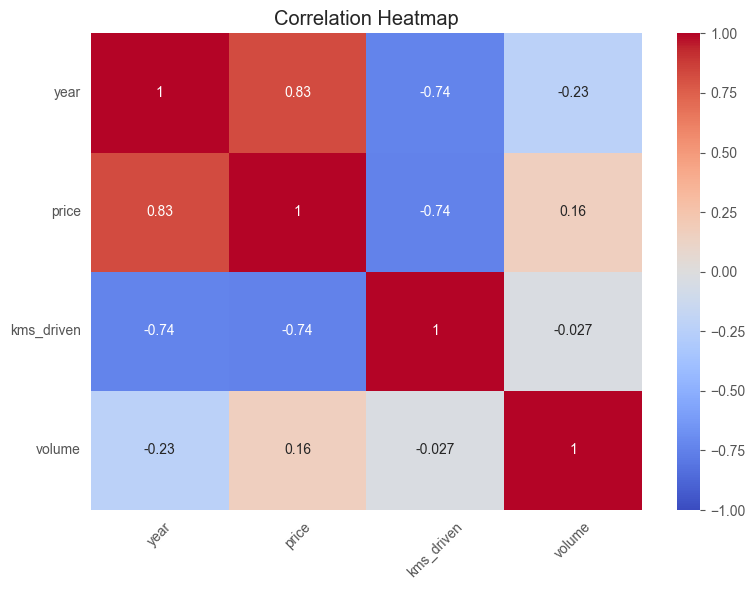

In [799]:
import seaborn as sns

# Вычисление корреляций
numeric_cols = ['year', 'price', 'kms_driven','volume']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [800]:
# Вычисление матрицы корреляции
numeric_columns = ['year', 'price', 'kms_driven', 'volume']
correlation_matrix = data[numeric_columns].corr()

# Вывод числовых значений корреляции
print("Числовые значения корреляции:")
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        correlation = correlation_matrix.loc[col1, col2]
        print(f"Корреляция между {col1} и {col2}: {correlation:.2f}")

Числовые значения корреляции:
Корреляция между year и price: 0.83
Корреляция между year и kms_driven: -0.74
Корреляция между year и volume: -0.23
Корреляция между price и kms_driven: -0.74
Корреляция между price и volume: 0.16
Корреляция между kms_driven и volume: -0.03


## Построение модели

In [801]:
# Разделение данных на X и Y
X=data[['name','company','year','kms_driven','fuel_type','volume','color']]
y=data['price']

In [802]:
# выводим X
X

,name,company,year,kms_driven,fuel_type,volume,color
0,KIA K5,KIA,2019.0,85000.0,Petrol,2.5,Black
1,KIA K5,KIA,2016.0,120000.0,LPG,2.0,White
2,KIA K5,KIA,2020.0,65000.0,LPG,2.0,Blue
3,KIA K5,KIA,2018.0,140000.0,Petrol,2.5,Silver
4,KIA K5,KIA,2017.0,90000.0,LPG,2.0,Gray
...,...,...,...,...,...,...,...
1987,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,1997.0,200000.0,Diesel,2.8,Red
1989,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,2002.0,115000.0,Petrol,5.0,Green
1991,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,1997.0,180000.0,Petrol,2.4,Black
1994,MERCEDES-BENZ E-CLASS W210,MERCEDES-BENZ,2000.0,145000.0,Diesel,2.8,Gray


#### Импортирование нужных библиотек

In [803]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [804]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [805]:
#Преобразование категориальных переменных в бинарные 
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','color']])

OneHotEncoder()

In [806]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','color']),
remainder='passthrough')

## Использование Decision Tree Regrossor

In [807]:
dtr=DecisionTreeRegressor()

In [808]:
pipe=make_pipeline(column_trans,dtr)

In [809]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['HONDA FIT', 'KIA K5', 'MERCEDES-BENZ E-CLASS W210',
       'TOYOTA CAMRY 70'], dtype=object),
                                                                            array(['HONDA', 'KIA', 'MERCEDES-BENZ', 'TOYOTA'], dtype=object),
                                                                            array(['Diesel', 'Hybrid', 'LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [810]:
y_pred=pipe.predict(X_test)

In [811]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model: Decision Tree ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error:{mae:.2f} ')
print(f'R^2 Score: {r2:.2f}')

Model: Decision Tree 
Mean Squared Error: 3983184.63
Mean Absolute Error:1062.48 
R^2 Score: 0.95


In [812]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['HONDA FIT','HONDA',2003,130000,'Petrol',1.3,'Black']).reshape(1,7)))

array([7600.])

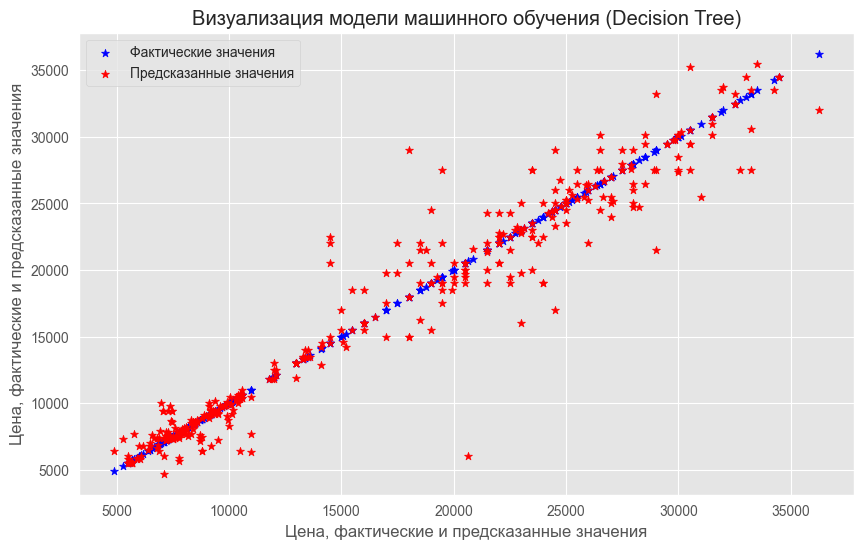

In [813]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_pred, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Decision Tree)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest

In [814]:
## Random Forest
rf = RandomForestRegressor()

In [815]:
pipeRF=make_pipeline(column_trans,rf)

In [816]:
pipeRF.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['HONDA FIT', 'KIA K5', 'MERCEDES-BENZ E-CLASS W210',
       'TOYOTA CAMRY 70'], dtype=object),
                                                                            array(['HONDA', 'KIA', 'MERCEDES-BENZ', 'TOYOTA'], dtype=object),
                                                                            array(['Diesel', 'Hybrid', 'LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [817]:
y_predRF=pipeRF.predict(X_test)

In [818]:
r2 = r2_score(y_test,y_predRF)
mae = mean_absolute_error(y_test, y_predRF)
mse = mean_squared_error(y_test, y_predRF)

print('Model: Random Forest ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error:{mae:.2f} ')
print(f'R^2 Score: {r2:.2f}')

Model: Random Forest 
Mean Squared Error: 2636684.02
Mean Absolute Error:947.28 
R^2 Score: 0.96


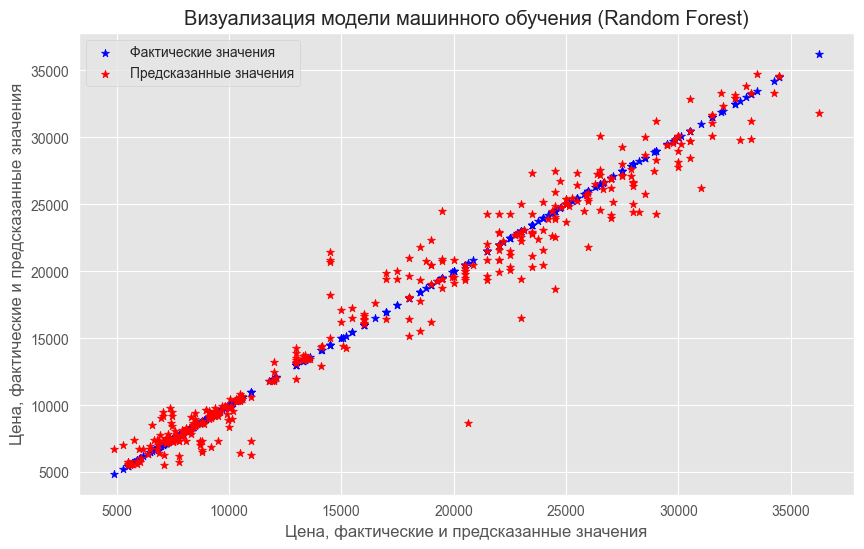

In [819]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_predRF, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Random Forest)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression

In [820]:
lr = LinearRegression()
pipeLR = make_pipeline(column_trans, lr)
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['HONDA FIT', 'KIA K5', 'MERCEDES-BENZ E-CLASS W210',
       'TOYOTA CAMRY 70'], dtype=object),
                                                                            array(['HONDA', 'KIA', 'MERCEDES-BENZ', 'TOYOTA'], dtype=object),
                                                                            array(['Diesel', 'Hybrid', 'LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('linearregression', LinearRegression())])

In [821]:
y_predLR=pipeLR.predict(X_test)

In [822]:
r2 = r2_score(y_test,y_predLR)
mae = mean_absolute_error(y_test, y_predLR)
mse = mean_squared_error(y_test, y_predLR)

print('Model: Linear Regression ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error:{mae:.2f} ')
print(f'R^2 Score: {r2:.2f}')

Model: Linear Regression 
Mean Squared Error: 10183140.01
Mean Absolute Error:2419.16 
R^2 Score: 0.86


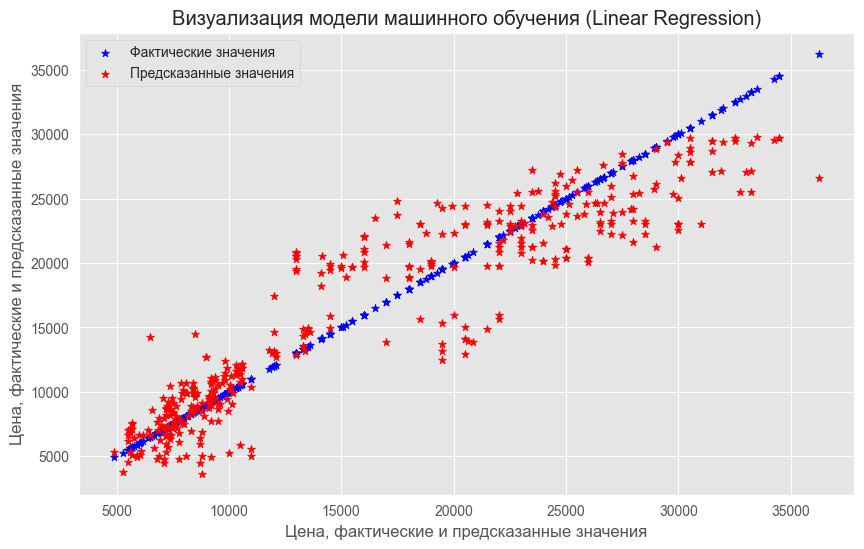

In [823]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_predLR, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Linear Regression)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

###  Выбор модели 

### Самой лечшей модели стал random forest
#### Model: Random Forest 
#### Mean Squared Error: 2080248.90
#### Mean Absolute Error:888.54 
#### R^2 Score: 0.97

### Импортирование данных в pickle

In [824]:
import pickle
pickle.dump(pipeRF,open('RandomForestRegressionModel.pkl','wb'))

In [825]:
pipeRF.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['HONDA FIT','HONDA',2003,100000,'Petrol',1.3,'Black']).reshape(1,7)))

array([7088.70309524])

In [826]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['HONDA FIT', 'KIA K5', 'MERCEDES-BENZ E-CLASS W210',
       'TOYOTA CAMRY 70'], dtype=object)